In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Salary_data.csv')

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


The staff with minimum years of experience(1.1) is paid #37,731 and staff with the highest number of experience is paid #122,391 as salary

In [6]:
new_names =  {'YearsExperience':'X', 'Salary':'y'}

dataset.rename(columns=new_names, inplace=True)

Simple Linear Rgression equation is represented by a

𝑦̂ 𝑖 = 𝑏0 + 𝑏1𝑥𝑖
 
where:

X: Independent variable that causes y to change

bo: Constant estimator/ intercept for y. Its value is the point at which regression line crosses y axis

b1: Cofficient/multiplier that depict the proportion to which a unit change in x is inflated or deflated

To conduct a regression analysis, we need to solve for b0 and b1

In [7]:
# Split the dataset into input (feature X) and output (Target y) from Pandas dataFrame named dataset

X = dataset.iloc[:, :-1].values #All rows, all columns excluding the last column indexed -1
y = dataset.iloc[:, 1].values #All rows, column 1

print ('\n Input Feature X = ', X, '\n The shape of X = ',X.shape,  ' \n Output (Y) = ', y, '\n Shape of y = ',y.shape)
print('Datatype of X and Y : ', type(X), type(y))


 Input Feature X =  [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] 
 The shape of X =  (30, 1)  
 Output (Y) =  [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.] 
 Shape of y =  (30,)
Datatype of X and Y :  <class 'numpy.ndarray'> <class 'numpy.ndarray'>


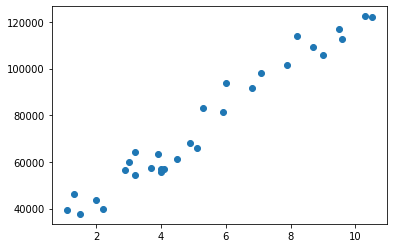

In [8]:
plt.scatter(X,y)
plt.show()

# 1. What linear regression equation best estimates y, based on X?
Using Scikit Learn (SKLEARN) Library, lets implement LinearRegression Class to train the Model and generate the regression equation

In [9]:
# Fitting Simple Linear Regression to the Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
regressor.score(X, y)

0.9569566641435084

In [11]:
#Intercept b0

print(regressor.intercept_)

25792.20019866871


In [12]:
#coefficient or slope of regression

regressor.coef_

array([9449.96232146])

In [13]:
#TO check correlation between variables

cor = dataset.corr()

print(cor)

          X         y
X  1.000000  0.978242
y  0.978242  1.000000


Therefore, the equation of Linear regression for the task is

predicted_salary = 9449.96X + 25792.20

# 2. What new values of y will the linear regression equation suggest in line with the previous data X?

In [14]:
#Predicting the Dataset results on input feature(years of experience) alone

y_pred = regressor.predict(X)
#Note: store the result in y_pred

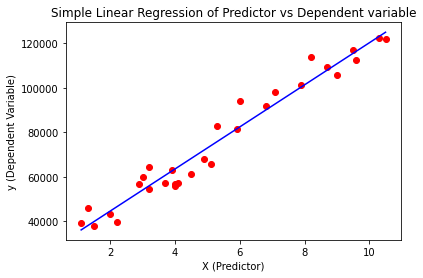

In [15]:
# Visualising the results
plt.scatter(X, y, color = 'red') #Scatter plot of the X an y dataset

plt.plot(X, regressor.predict(X), color = 'blue')#Line plot of X against predicted Y 
#(remember that output of regressor.predict is yhat)

plt.title('Simple Linear Regression of Predictor vs Dependent variable')
plt.xlabel('X (Predictor)')
plt.ylabel('y (Dependent Variable)')
plt.show()


In [16]:
#Adding the result column to the existing dataset table

dataset['Predicted_salary'] = y_pred

dataset

,X,y,Predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


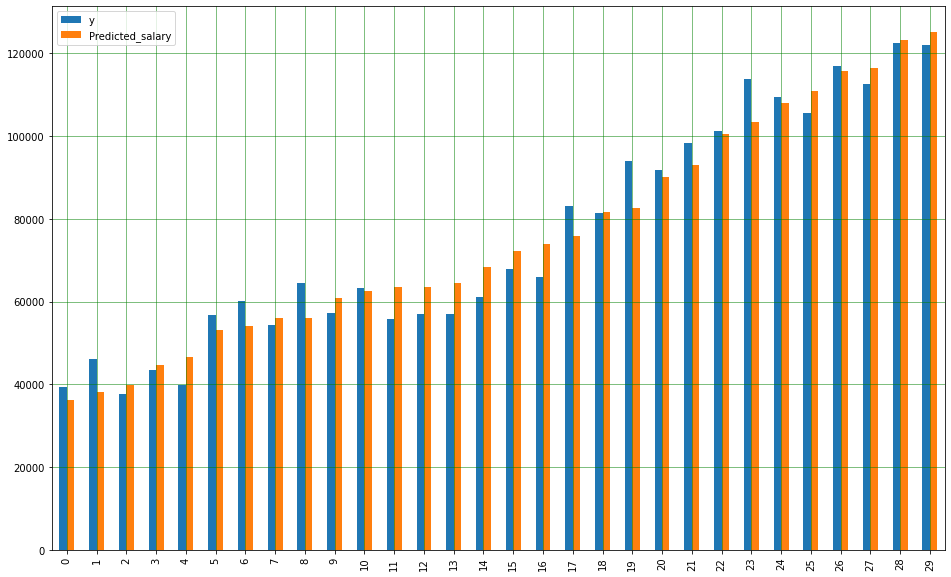

In [17]:
#A bar plot showing the difference between actual value (y) and predicted value (yhat)
dataset[['y','Predicted_salary']].plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 3. How well does the regression equation fit the data?
 
This is a function of the model error established from model evaluation

In [18]:
#Slicing out the Actual output(y) and Predicted output (yhat)
result = dataset[['y', 'Predicted_salary']]

In [19]:
#creating a column in the result to store mean errors from all observations
n = len(dataset)

#Error from each prediction(𝑦𝑖−𝑦̂i)
result['error'] = dataset['y'].subtract(dataset['Predicted_salary'])

print(result)

#summation of all error function from all predictions(cost_function)
cost_function = abs(result['error']).sum()

Mean_Absolute_Error = cost_function / n


print()

print('cost function = ', cost_function)
print('Mean_Absolute_Error = ', Mean_Absolute_Error)

           y  Predicted_salary         error
0    39343.0      36187.158752   3155.841248
1    46205.0      38077.151217   8127.848783
2    37731.0      39967.143681  -2236.143681
3    43525.0      44692.124842  -1167.124842
4    39891.0      46582.117306  -6691.117306
5    56642.0      53197.090931   3444.909069
6    60150.0      54142.087163   6007.912837
7    54445.0      56032.079627  -1587.079627
8    64445.0      56032.079627   8412.920373
9    57189.0      60757.060788  -3568.060788
10   63218.0      62647.053252    570.946748
11   55794.0      63592.049484  -7798.049484
12   56957.0      63592.049484  -6635.049484
13   57081.0      64537.045717  -7456.045717
14   61111.0      68317.030645  -7206.030645
15   67938.0      72097.015574  -4159.015574
16   66029.0      73987.008038  -7958.008038
17   83088.0      75877.000502   7210.999498
18   81363.0      81546.977895   -183.977895
19   93940.0      82491.974127  11448.025873
20   91738.0      90051.943985   1686.056015
21   98273

In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 4644.2012894435375
Mean Squared Error: 31270951.722280968
Root Mean Squared Error: 5592.043608760662
